# Libraries

In [76]:
%load_ext autoreload
%autoreload 2
import torch
from IPython.display import HTML
from models import LSTM, OneStep
from animation_utils import make_anim
import pandas as pd
from utils import min_max_scaler, prediction

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Define the parameters of the model

In [77]:
# These are the masses and lengths of the pendulum
# Number of points is the number of points in the trajectory
number_of_points = 2000
simulation_time = 20.0
lookback = 40
dt = simulation_time / number_of_points
print("dt = ", dt)
print()

params = {
    'm1' : 2,
    'm2' : 1,
    'l1' : 1.4,
    'l2' : 1,
    'g' : 9.8,
    'number_of_points' : number_of_points
}
double_pendulum = DoublePendulum(**params)
trajectory = double_pendulum.compute_trajectory(theta1=60, theta2=-20, number_of_points=number_of_points, simulation_time=simulation_time)

dt =  0.01

The double pendulum is initialized with the following physical parameters:
m1 =  2 kg
m2 =  1 kg
l1 =  1.4 m
l2 =  1 m
g =  9.8 m/s^2
number of points =  2000
Trajectory computed


In [78]:
double_pendulum.get_physical_parameters()

m1 =  2 kg
m2 =  1 kg
l1 =  1.4 m
l2 =  1 m
g =  9.8 m/s^2
number of points =  2000


(2, 1, 1.4, 1, 9.8, 2000)

# Pretrained model

In [94]:
input_dim = 4
output_dim = 4
hidden_size = 100
num_layers = 4

model = LSTM(input_dim=input_dim, output_dim=output_dim, hidden_size=hidden_size, num_layers=4)
model.load_state_dict(torch.load('models/lstm_gpu', map_location=torch.device('cpu')))

<All keys matched successfully>

In [125]:
actual_predictions = prediction(model, trajectory)

# Animation

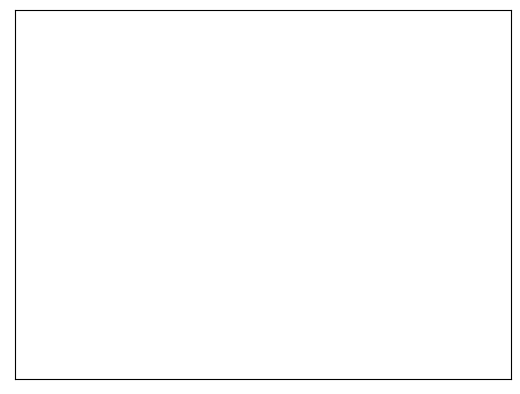

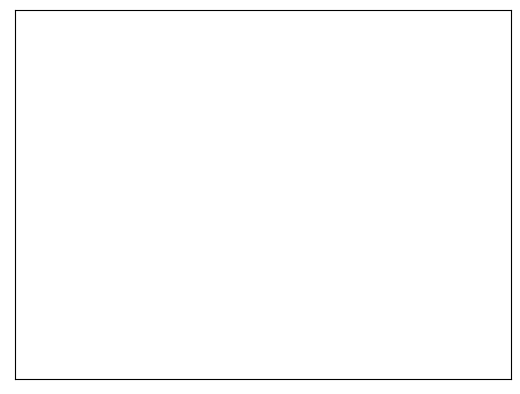

In [90]:
anim = make_anim(double_pendulum, trajectory)
anim_predictions = make_anim(double_pendulum, actual_predictions)

In [91]:
HTML(anim.to_html5_video())

In [92]:
HTML(anim_predictions.to_html5_video())